# **What's your Major?**
## **A simple Data Cleaning and Simple Visualizations of `Where it Pays to Attend College`**
 
Description: Salaries by college, region, and academic major

Source: https://www.kaggle.com/datasets/wsj/college-

This notebook utilizes the six principles of EDA from the Google Analytics Course. This practice comes in no particular order as sometimes we need to repeat certain steps after validating our data.

![Image](https://i.ibb.co/BTT0JSZ/EDA.png)

In [2]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
college_degree =pd.read_csv("degrees-that-pay-back.csv")
college_type = pd.read_csv("salaries-by-college-type.csv")
college_region = pd.read_csv("salaries-by-region.csv")

# Discovering 

In this step, I familiarize myself with the data using methods like shape, describe, info, column and size. 

In [4]:
college_type.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [5]:
college_region.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [6]:
college_degree.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [7]:
#Checking columns on both dataframes
print("Columns by region:\n", college_region.columns)
print("Columns by type:\n", college_type.columns)
print("Columns by degree:\n", college_degree.columns)

Columns by region:
 Index(['School Name', 'Region', 'Starting Median Salary',
       'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary',
       'Mid-Career 25th Percentile Salary',
       'Mid-Career 75th Percentile Salary',
       'Mid-Career 90th Percentile Salary'],
      dtype='object')
Columns by type:
 Index(['School Name', 'School Type', 'Starting Median Salary',
       'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary',
       'Mid-Career 25th Percentile Salary',
       'Mid-Career 75th Percentile Salary',
       'Mid-Career 90th Percentile Salary'],
      dtype='object')
Columns by degree:
 Index(['Undergraduate Major', 'Starting Median Salary',
       'Mid-Career Median Salary',
       'Percent change from Starting to Mid-Career Salary',
       'Mid-Career 10th Percentile Salary',
       'Mid-Career 25th Percentile Salary',
       'Mid-Career 75th Percentile Salary',
       'Mid-Career 90th Percentile Salary'],
      dtype='object')


# Joining 

In this step, we are adding the `region` column into our first dataframe to seee which regions schools belong in an easier view when we load out dataset.

In [8]:
#adding regions to the dataframe as a whole
merged_df = college_type.merge(college_region[['School Name', 'Region']], on='School Name', how='left')

merged_df.head(10)

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Region
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00",Northeastern
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,California
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,California
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00",Northeastern
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN,Northeastern
5,Worcester Polytechnic Institute (WPI),Engineering,"$61,000.00","$114,000.00","$80,000.00","$91,200.00","$137,000.00","$180,000.00",Northeastern
6,Carnegie Mellon University (CMU),Engineering,"$61,800.00","$111,000.00","$63,300.00","$80,100.00","$150,000.00","$209,000.00",Northeastern
7,Rensselaer Polytechnic Institute (RPI),Engineering,"$61,100.00","$110,000.00","$71,600.00","$85,500.00","$140,000.00","$182,000.00",Northeastern
8,Georgia Institute of Technology,Engineering,"$58,300.00","$106,000.00","$67,200.00","$85,200.00","$137,000.00","$183,000.00",Southern
9,Colorado School of Mines,Engineering,"$58,100.00","$106,000.00","$62,200.00","$87,900.00","$142,000.00","$201,000.00",Western


In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   School Name                        269 non-null    object
 1   School Type                        269 non-null    object
 2   Starting Median Salary             269 non-null    object
 3   Mid-Career Median Salary           269 non-null    object
 4   Mid-Career 10th Percentile Salary  231 non-null    object
 5   Mid-Career 25th Percentile Salary  269 non-null    object
 6   Mid-Career 75th Percentile Salary  269 non-null    object
 7   Mid-Career 90th Percentile Salary  231 non-null    object
 8   Region                             268 non-null    object
dtypes: object(9)
memory usage: 19.0+ KB


# Structuring

We noticed most of our datatypes in the salary columns are in object data type, we need to convert them to float to have a better analysis of our data. 

In [10]:
conversion = ['Starting Median Salary',
            'Mid-Career Median Salary',
    'Mid-Career 10th Percentile Salary',
    'Mid-Career 25th Percentile Salary',
    'Mid-Career 75th Percentile Salary',
    'Mid-Career 90th Percentile Salary']

# Convert the columns to float 
for column in conversion:
    merged_df[column] = merged_df[column].str.replace("$","")
    merged_df[column] = merged_df[column].str.replace(",","")
    merged_df[column] = pd.to_numeric(merged_df[column])

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   School Name                        269 non-null    object 
 1   School Type                        269 non-null    object 
 2   Starting Median Salary             269 non-null    float64
 3   Mid-Career Median Salary           269 non-null    float64
 4   Mid-Career 10th Percentile Salary  231 non-null    float64
 5   Mid-Career 25th Percentile Salary  269 non-null    float64
 6   Mid-Career 75th Percentile Salary  269 non-null    float64
 7   Mid-Career 90th Percentile Salary  231 non-null    float64
 8   Region                             268 non-null    object 
dtypes: float64(6), object(3)
memory usage: 19.0+ KB


Let's do the same for college degree dataframe.

In [11]:
#View columns that need conversion
college_degree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Undergraduate Major                                50 non-null     object 
 1   Starting Median Salary                             50 non-null     object 
 2   Mid-Career Median Salary                           50 non-null     object 
 3   Percent change from Starting to Mid-Career Salary  50 non-null     float64
 4   Mid-Career 10th Percentile Salary                  50 non-null     object 
 5   Mid-Career 25th Percentile Salary                  50 non-null     object 
 6   Mid-Career 75th Percentile Salary                  50 non-null     object 
 7   Mid-Career 90th Percentile Salary                  50 non-null     object 
dtypes: float64(1), object(7)
memory usage: 3.2+ KB


In [12]:
to_convert = conversion = ['Starting Median Salary',
            'Mid-Career Median Salary',
    'Mid-Career 10th Percentile Salary',
    'Mid-Career 25th Percentile Salary',
    'Mid-Career 75th Percentile Salary',
    'Mid-Career 90th Percentile Salary']

# Convert the columns to float 
for column in to_convert:
    college_degree[column] = college_degree[column].str.replace("$","")
    college_degree[column] = college_degree[column].str.replace(",","")
    college_degree[column] = pd.to_numeric(college_degree[column])
    
college_degree.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Undergraduate Major                                50 non-null     object 
 1   Starting Median Salary                             50 non-null     float64
 2   Mid-Career Median Salary                           50 non-null     float64
 3   Percent change from Starting to Mid-Career Salary  50 non-null     float64
 4   Mid-Career 10th Percentile Salary                  50 non-null     float64
 5   Mid-Career 25th Percentile Salary                  50 non-null     float64
 6   Mid-Career 75th Percentile Salary                  50 non-null     float64
 7   Mid-Career 90th Percentile Salary                  50 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.2+ KB


# Cleaning

Checking for duplicates, missing values, typos, outliers, formattting and inconsistency in our data.



In [13]:
merged_df.isnull().sum()

School Name                           0
School Type                           0
Starting Median Salary                0
Mid-Career Median Salary              0
Mid-Career 10th Percentile Salary    38
Mid-Career 25th Percentile Salary     0
Mid-Career 75th Percentile Salary     0
Mid-Career 90th Percentile Salary    38
Region                                1
dtype: int64

Seems like we have 38 missing values in the columns of mid career 10th and 90th percentile.

<Axes: >

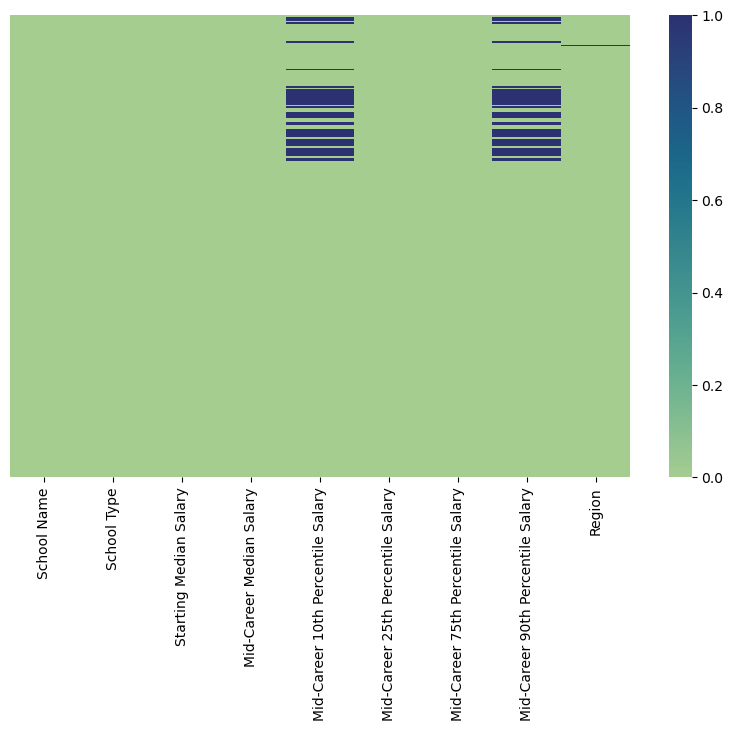

In [14]:
#Using a heatmap to see the distribution of the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.isnull(), yticklabels= False, cmap="crest")

Seems that there are is much data missing in comparison to their columns, my approach would be imputation of these data with average values instead of dropping them because it might interfere with future analysis. This approach is applicable for the salary columns except for the region column. 

In [15]:
# Check if the "Region" column is null for each row and create a boolean Series
missing_value = merged_df['Region'].isnull()

# Filter the DataFrame to show only the rows with missing values in the "Region" column
missing_rows = merged_df[missing_value]

# Display the DataFrame containing missing rows
missing_rows.head()


,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Region
17,Embry-Riddle Aeronautical University (ERAU),Engineering,52700.0,80700.0,49800.0,64000.0,106000.0,142000.0,NaN


I will be dropping this column, since in this practice I cannot determine which campus branch is this university located, it has many locations within the US.

In [16]:
#Dropping row
merged_df = merged_df.dropna(subset=['Region'])
merged_df['Region'].isna().any()

False

In [37]:
#Filling missing values in the mid 10th salary columns
mid10_values = merged_df['Mid-Career 10th Percentile Salary'].mean()
print('10th Mean value:\n', mid10_values)

merged_df['Mid-Career 10th Percentile Salary'].fillna(mid10_values, inplace=True)

#Filling missing values in the mid 90th salary columns
mid90_values = merged_df['Mid-Career 90th Percentile Salary'].mean()
print('90th Mean value:\n', mid90_values)

merged_df['Mid-Career 90th Percentile Salary'].fillna(mid90_values, inplace=True)

10th Mean value:
 44059.701492537315
90th Mean value:
 157097.01492537314


# Validating

Let's check in our college_degree and the merged_df dataframe for missing values.

In [18]:
college_degree.isnull().any()

Undergraduate Major                                  False
Starting Median Salary                               False
Mid-Career Median Salary                             False
Percent change from Starting to Mid-Career Salary    False
Mid-Career 10th Percentile Salary                    False
Mid-Career 25th Percentile Salary                    False
Mid-Career 75th Percentile Salary                    False
Mid-Career 90th Percentile Salary                    False
dtype: bool

No missing values on this dataframe

In [35]:
merged_df.isnull().any()

School Name                          False
School Type                          False
Starting Median Salary               False
Mid-Career Median Salary             False
Mid-Career 10th Percentile Salary    False
Mid-Career 25th Percentile Salary    False
Mid-Career 75th Percentile Salary    False
Mid-Career 90th Percentile Salary    False
Region                               False
dtype: bool

In [41]:
#Checking for duplicates

print("Merged df duplicates:", merged_df.duplicated().any())
print("Merged df duplicates:", college_degree.duplicated().any())

Merged df duplicates: False
Merged df duplicates: False


No more missing values on both dataframes, there are no duplicates as well. Let's move to Visualizations.

# Visualizations/Presenting

-  Salaries by major
-  Salaries by college type
- Salaries by region

<Axes: title={'center': 'Histogram of whole data'}, ylabel='Count'>

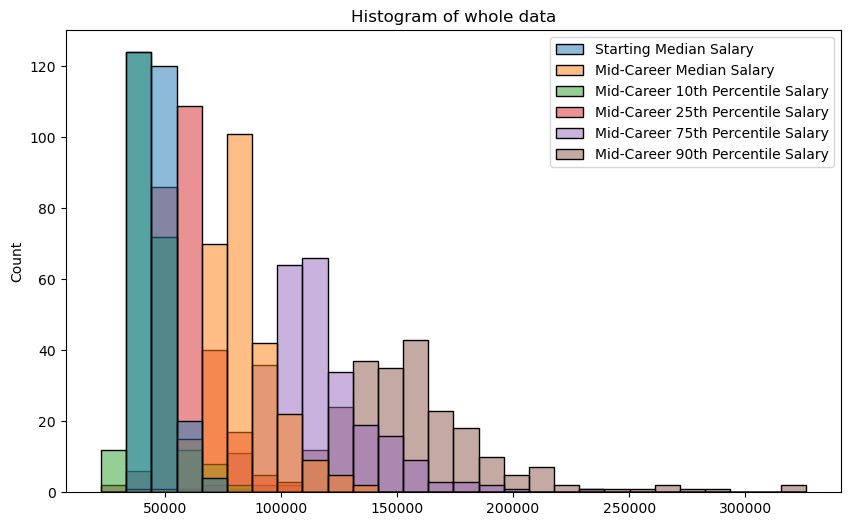

In [20]:
#Plot histogram to see distribution of our values
plt.figure(figsize=(10, 6))
plt.title('Histogram of whole data');
sns.histplot(merged_df)

The distribution of salaries in our dataset exhibits a right-skewed pattern. It is noteworthy that salaries exceeding 300,000 likely represent executive positions within companies. While these values may appear as outliers, it is important to emphasize that they do not constitute extreme data points. Instead, they represent valid observations, as such salary levels are realistically possible. However, it is evident that only a small portion of individuals earn at this level.

### Starting Median Salary by Major

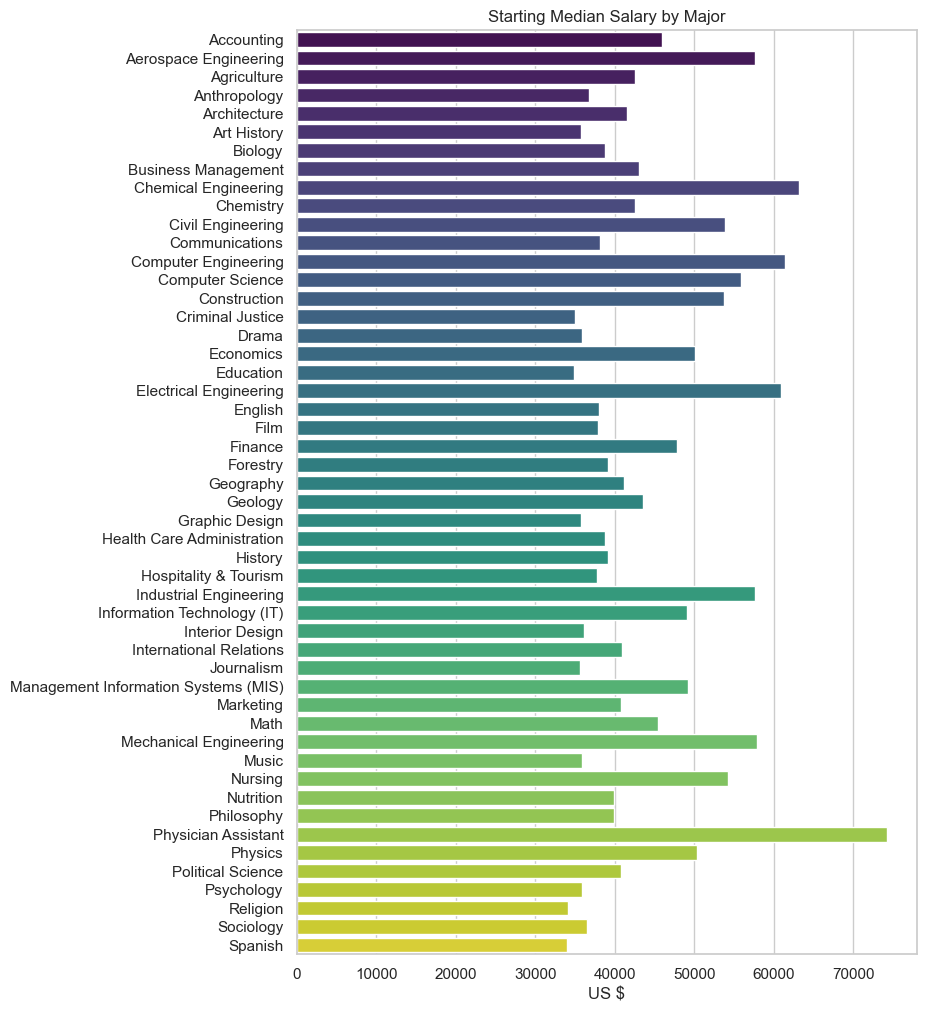

In [21]:
sns.set(style="whitegrid")


x = college_degree['Starting Median Salary']
labels = college_degree['Undergraduate Major']


plt.figure(figsize=(8, 12))
sns.barplot(x=x, y=labels, palette="viridis")

plt.xlabel('US $')
plt.ylabel('')
plt.title('Starting Median Salary by Major')

plt.show()


C:\Users\dmqui\AppData\Local\Temp\ipykernel_7768\1588160836.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x, y=labels, ci= None, )


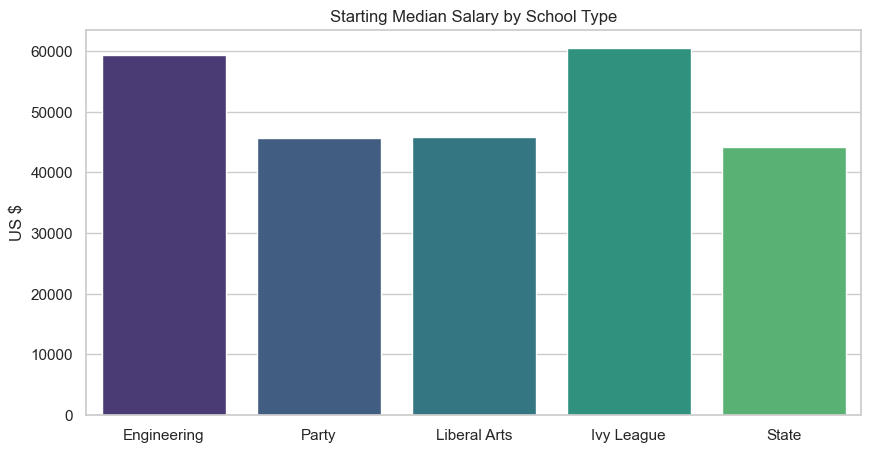

In [22]:
sns.set(style="whitegrid", palette="viridis")

x = merged_df['School Type']
labels = merged_df['Starting Median Salary']

plt.figure(figsize=(10, 5))
sns.barplot(x=x, y=labels, ci= None, )

plt.xlabel('')
plt.ylabel('US $')
plt.title('Starting Median Salary by School Type')

plt.show()

C:\Users\dmqui\AppData\Local\Temp\ipykernel_7768\1066654949.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x, y=labels, ci= None, )


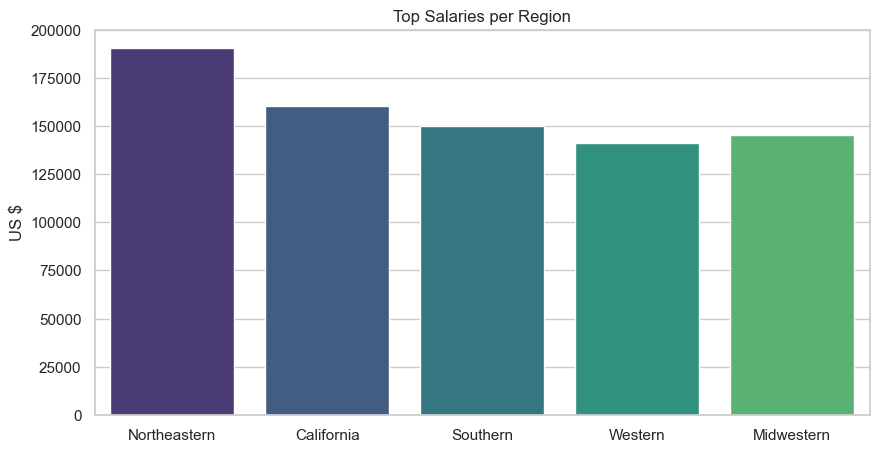

In [23]:
sns.set(style="whitegrid", palette="viridis")

x = merged_df['Region']
labels = merged_df['Mid-Career 90th Percentile Salary']

plt.figure(figsize=(10, 5))
sns.barplot(x=x, y=labels, ci= None, )

plt.xlabel('')
plt.ylabel('US $')
plt.title('Top Salaries per Region')

plt.show()